<a href="https://colab.research.google.com/github/raju-sharma/Game_of_life/blob/main/SVM_Result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
!pip install librosa

In [94]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import os
import numpy as np
import pandas as pd

In [95]:
# !unzip UnderWater_Dataset.zip

In [96]:
filename = "UnderWater_Dataset/KillerWhale/60026003.wav"


In [97]:
data, sample_rate = librosa.load(filename)
ipd.Audio(data,rate=sample_rate)

In [98]:
print(data,sample_rate)

[0.00318003 0.00665283 0.00788284 ... 0.02308168 0.01698721 0.00993906] 22050


In [99]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 55)


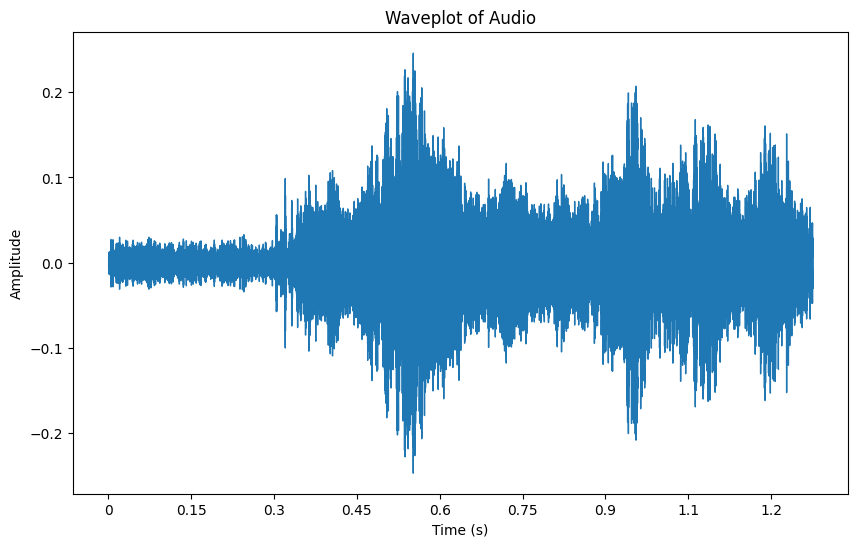

In [100]:
plt.figure(figsize=(10, 6))
librosa.display.waveshow(data, sr=sample_rate)
plt.title('Waveplot of Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [101]:
file_names=[]
base_directory = 'UnderWater_Dataset'
# Folder name containing the audio files
folder_name = ['BeardSeal','BowheadWhale','CommonDolphin','HarpSeal','HumpbackWhale','KillerWhale','LeapordSeal','SpinnerDolphin','Walrus','WhitebeakedDolphin']
# Get the list of files within the folder
for name in folder_name :
  folder_path = os.path.join(base_directory, name)
  file_names.append(os.listdir(folder_path))
  # Initialize a list to store the full absolute paths
print((file_names))


[['7202100Z.wav', '66038002.wav', '71012009.wav', '66038007.wav', '78018005.wav', '78018003.wav', '78018002.wav', '70025005.wav', '66038001.wav', '7801800J.wav', '70025004.wav', '71012002.wav', '71012001.wav', '66038003.wav', '70025001.wav', '71012008.wav', '71012005.wav', '70025009.wav', '71012007.wav', '66038004.wav', '7801800D.wav', '70025002.wav', '78018001.wav', '7801800M.wav', '70025007.wav', '7801800H.wav', '70025006.wav', '7801800B.wav', '66038005.wav', '71012003.wav', '70025008.wav', '7202100V.wav', '70025003.wav', '7202100T.wav'], ['8800600L.wav', '7202100Z.wav', '88006007.wav', '8800600P.wav', '78018003.wav', '8800600E.wav', '78018002.wav', '7801800J.wav', '8800600A.wav', '8800600I.wav', '8800600N.wav', '8800600F.wav', '88006001.wav', '8800600Q.wav', '7801800D.wav', '88006008.wav', '8800600G.wav', '8800600D.wav', '7801800H.wav', '8800600C.wav', '7801800B.wav', '8800600O.wav', '88006006.wav', '72021005.wav', '8800600H.wav', '8800600K.wav', '88006003.wav', '8800600J.wav', '880

In [102]:
# Construct the full absolute paths
audio_files = []
label_data = []
i = 0
for name in folder_name :
  folder_name[i] = os.path.join(base_directory, name)
  i += 1
i = 0
for file_name in file_names:
  for voice in file_name :
    full_path = os.path.join(folder_name[i], voice)
    audio_files.append(full_path)
    label_data.append(i);
  i += 1
audio_files

['UnderWater_Dataset/BeardSeal/7202100Z.wav',
 'UnderWater_Dataset/BeardSeal/66038002.wav',
 'UnderWater_Dataset/BeardSeal/71012009.wav',
 'UnderWater_Dataset/BeardSeal/66038007.wav',
 'UnderWater_Dataset/BeardSeal/78018005.wav',
 'UnderWater_Dataset/BeardSeal/78018003.wav',
 'UnderWater_Dataset/BeardSeal/78018002.wav',
 'UnderWater_Dataset/BeardSeal/70025005.wav',
 'UnderWater_Dataset/BeardSeal/66038001.wav',
 'UnderWater_Dataset/BeardSeal/7801800J.wav',
 'UnderWater_Dataset/BeardSeal/70025004.wav',
 'UnderWater_Dataset/BeardSeal/71012002.wav',
 'UnderWater_Dataset/BeardSeal/71012001.wav',
 'UnderWater_Dataset/BeardSeal/66038003.wav',
 'UnderWater_Dataset/BeardSeal/70025001.wav',
 'UnderWater_Dataset/BeardSeal/71012008.wav',
 'UnderWater_Dataset/BeardSeal/71012005.wav',
 'UnderWater_Dataset/BeardSeal/70025009.wav',
 'UnderWater_Dataset/BeardSeal/71012007.wav',
 'UnderWater_Dataset/BeardSeal/66038004.wav',
 'UnderWater_Dataset/BeardSeal/7801800D.wav',
 'UnderWater_Dataset/BeardSeal/700

In [103]:
print(label_data)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]


In [104]:
loaded_data = []
sample_rates = []
i = 0
flag = False
for file_path in audio_files:
    data, sample_rate = librosa.load(file_path)
    mfccs_features = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=100)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    loaded_data.append([mfccs_scaled_features,label_data[i]])
    i += 1
    sample_rates.append(sample_rate)

In [105]:
loaded_data

[[array([-2.4844524e+02,  1.2949165e+02, -5.8098801e+01,  2.3274063e+01,
         -1.9172121e+01, -1.9722027e+01,  2.8303085e+01, -9.9894981e+00,
          6.6299925e+00,  1.4069859e+01,  2.6538830e+00,  2.6738081e+01,
          4.2512703e+00, -9.3399668e+00, -5.4759932e+00, -1.8252266e+01,
         -3.3956754e+00, -1.7561141e+00, -4.1394267e+00,  1.1529343e+01,
          7.4943581e+00,  5.7456431e+00, -7.1518887e-03, -7.0936284e+00,
          2.5775974e+00, -3.4270539e+00, -4.5718751e+00,  3.5000513e+00,
         -1.4415958e+00,  3.0296807e+00,  4.1705070e+00,  2.2992142e-02,
          3.2870231e+00, -2.4692595e+00, -3.4461825e+00,  1.2259535e+00,
         -1.3819829e+00,  5.8221322e-01,  3.5255015e+00,  2.4043596e+00,
         -7.2886032e-01, -2.1466098e+00,  1.0219960e+00,  5.1972914e-01,
         -1.4602873e-01,  4.1378051e-01, -8.9990944e-02,  1.5757475e+00,
         -9.5654291e-01, -8.9662993e-01,  3.5923204e-01, -5.3594313e+00,
         -2.2492204e+00,  1.9689678e+00, -8.8580512

In [106]:
extracted_features_df=pd.DataFrame( loaded_data,columns=['feature','class'])
extracted_features_df.head(5)

,feature,class
0,"[-248.44524, 129.49165, -58.0988, 23.274063, -...",0
1,"[-168.4555, 109.81647, -51.315796, 18.232635, ...",0
2,"[-409.62646, 216.2451, 11.385243, -22.173965, ...",0
3,"[-185.95796, 113.697815, -43.93834, 37.200745,...",0
4,"[-189.80292, 190.36446, -30.468918, 37.979553,...",0


In [107]:
import numpy as np
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [108]:
len(X[3])

100

In [109]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 198)

In [111]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [112]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [113]:
y_pred = classifier.predict(X_test)

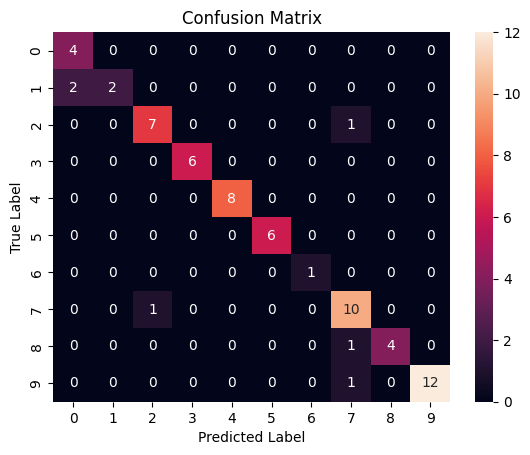

In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [115]:
accuracy_score(y_test,y_pred)

0.9090909090909091